In [1]:
from one.api import ONE
ONE.setup(base_url='https://openalyx.internationalbrainlab.org', silent=True)
one = ONE(password='international')

Connected to https://openalyx.internationalbrainlab.org as user "intbrainlab"


In [2]:
from one.api import ONE
one = ONE(base_url='https://openalyx.internationalbrainlab.org')


In [3]:
sessions = one.search()

In [4]:
print(one.search_terms())

('django', 'laboratory', 'limit', 'dataset_types', 'procedures', 'end_time', 'atlas_id', 'json', 'dataset_qc_lte', 'offset', 'start_time', 'extended_qc', 'location', 'name', 'n_correct_trials', 'narrative', 'number', 'subject', 'performance_gte', 'histology', 'id', 'atlas_name', 'task_protocol', 'atlas_acronym', 'project', 'date_range', 'performance_lte', 'parent_session', 'nickname', 'type', 'users', 'projects', 'datasets', 'tag', 'auto_datetime', 'qc', 'n_trials')


In [5]:
eids=one.search(project='brainwide',subject='SWC_043')
import pprint
pprint.pprint(eids)

[UUID('4ecb5d24-f5cc-402c-be28-9d0f7cb14b3a'),
 UUID('c6db3304-c906-400c-aa0f-45dd3945b2ea'),
 UUID('88d24c31-52e4-49cc-9f32-6adbeb9eba87'),
 UUID('6fb1e12c-883b-46d1-a745-473cde3232c8'),
 UUID('695a6073-eae0-49e0-bb0f-e9e57a9275b9'),
 UUID('6f09ba7e-e3ce-44b0-932b-c003fb44fb89'),
 UUID('f3ce3197-d534-4618-bf81-b687555d1883'),
 UUID('e3124ab9-ab19-4727-96d4-3d57e73a838a'),
 UUID('48cb7018-94c6-4b0b-9283-c84fd91668cf'),
 UUID('d243f50d-8628-49cf-b9bd-9615e4d722ff'),
 UUID('3da7376a-3069-4952-9813-324bc8ace4e8'),
 UUID('31f4b5a8-a21b-46dc-8a25-15d2838a9c57'),
 UUID('85d3fcd5-5661-421f-bc38-ba3342495bf7'),
 UUID('6dc252fa-272d-41c3-bd64-75a696149cd5'),
 UUID('7a41397c-a080-4495-81be-7ec18ee69ffa'),
 UUID('546675f0-c3ee-42be-b856-911142c3b968'),
 UUID('c41db7e4-d990-4206-bc8f-21d8324f2c34'),
 UUID('a5bae8f1-c421-4f59-b71d-8f682122f757'),
 UUID('66dd354c-1c70-4f6c-8242-63ea69352a65'),
 UUID('421803dd-0751-4175-9534-c6cbee433cc2'),
 UUID('64ef0a2c-4e4d-470a-afa1-bc35c765ab03'),
 UUID('d52644

In [6]:
from one.api import ONE
one = ONE()
eid = eids[0]


In [7]:

passive_Gabor = one.load_dataset(eid, '*passiveGabor*', collection='alf')
print(passive_Gabor.keys())
start = passive_Gabor['start']
end = passive_Gabor['stop']
for i in range (len(start)):
    trial_i = {
    'start': passive_Gabor['start'][i],
    'stop': passive_Gabor['stop'][i],
    'contrast': passive_Gabor['contrast'][i],
    'position': passive_Gabor['position'][i],
    'phase': passive_Gabor['phase'][i],
    }
    if i%30==0:
        print(trial_i)

Index(['Unnamed: 0', 'start', 'stop', 'position', 'contrast', 'phase'], dtype='object')
{'start': np.float64(3956.475449553957), 'stop': np.float64(3956.7754495539566), 'contrast': np.float64(0.0625), 'position': np.float64(-35.0), 'phase': np.float64(3.1249944058688106)}
{'start': np.float64(4013.390087524014), 'stop': np.float64(4013.674559074014), 'contrast': np.float64(0.125), 'position': np.float64(35.0), 'phase': np.float64(2.011318169234523)}
{'start': np.float64(4064.972795404065), 'stop': np.float64(4065.2741319340657), 'contrast': np.float64(1.0), 'position': np.float64(-35.0), 'phase': np.float64(0.0759019873772497)}
{'start': np.float64(4118.905468264119), 'stop': np.float64(4119.2231031641195), 'contrast': np.float64(0.125), 'position': np.float64(-35.0), 'phase': np.float64(1.300340093772513)}
{'start': np.float64(4165.371521194165), 'stop': np.float64(4165.689122764165), 'contrast': np.float64(0.0), 'position': np.float64(35.0), 'phase': np.float64(2.6089378391299403)}
{

In [8]:
contrast=passive_Gabor["contrast"]
print(len(contrast)==len(start))
print(contrast)

True
0      0.0625
1      1.0000
2      1.0000
3      0.0625
4      0.2500
        ...  
175    0.0625
176    1.0000
177    0.1250
178    1.0000
179    0.0000
Name: contrast, Length: 180, dtype: float64


In [10]:
import numpy as np
unique_contrasts, y = np.unique(contrast, return_inverse=True)
print(unique_contrasts)  # check how many classes

[0.     0.0625 0.125  0.25   1.    ]


In [11]:
# Load visual stimulus task replay events
visual_TR = one.load_dataset(eid, '*passiveGabor*', collection='alf')

# Load auditory stimulus task replay events
auditory_TR = one.load_dataset(eid, '*passiveStims*', collection='alf')

In [10]:
# Find first probe insertion for session
pid = one.alyx.rest('insertions', 'list', session=eid)[0]['id']

from brainbox.io.one import SpikeSortingLoader
from iblatlas.atlas import AllenAtlas
import numpy as np
ba = AllenAtlas()

# Load in spikesorting
sl = SpikeSortingLoader(pid=pid, one=one, atlas=ba)
spikes, clusters, channels = sl.load_spike_sorting()
clusters = sl.merge_clusters(spikes, clusters, channels)
cluster_ids = clusters['cluster_id'][clusters['ks2_label'] == 1]
print(np.unique(clusters['acronym']))
target_region = "HY"   
region_cluster_ids = clusters['cluster_id'][clusters['acronym'] == target_region]
# Find spike times during spontaneous activity
trials=np.c_[start, end]
# Count the number of clusters during SP time period and compute firing rate
from brainbox.population.decode import get_spike_counts_in_bins
counts, cluster_ids = get_spike_counts_in_bins(spikes['times'], spikes['clusters'],trials)
start = np.array(start)
end = np.array(end)
fr = counts.T / (end - start)[:, None]
print(fr.shape)  # n_trials x n_neurons

['BST' 'HY' 'LPO' 'LSr' 'LSv' 'NDB' 'PS' 'STR' 'aco' 'ccb']
(180, 1143)


In [57]:
cluster_id = region_cluster_ids[0]
# mask of spikes belonging to the chosen cluster
mask = spikes.clusters == cluster_id
cluster_spike_times = spikes.times[mask]
trials = np.c_[start, end]   # shape (N, 2)

In [58]:
raster = []

for t_start, t_end in trials:
    # logical mask for spikes within this interval
    idx = (cluster_spike_times >= t_start) & (cluster_spike_times < t_end)
    # align to trial onset if desired
    aligned_times = cluster_spike_times[idx] - t_start
    raster.append(aligned_times)

In [59]:
bin_size = 0.001  # 1 ms
max_dur = np.max(end - start)
nbins = int(np.ceil(max_dur / bin_size))

binned_raster = np.zeros((len(trials), nbins))

for i, (t_start, t_end) in enumerate(trials):
    idx = (cluster_spike_times >= t_start) & (cluster_spike_times < t_end)
    rel_times = cluster_spike_times[idx] - t_start
    bin_idx = (rel_times / bin_size).astype(int)
    binned_raster[i, bin_idx] = 1

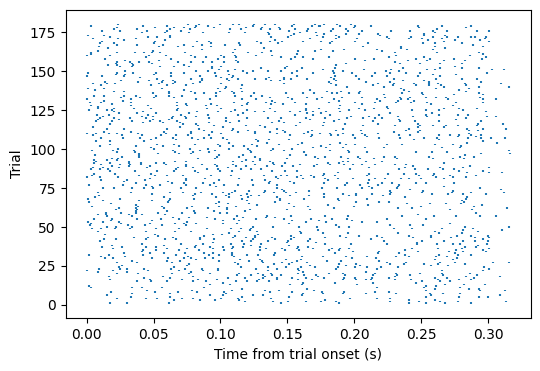

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
for i, spikes_i in enumerate(raster):
    plt.vlines(spikes_i, i + 0.5, i + 1.5)
plt.xlabel("Time from trial onset (s)")
plt.ylabel("Trial")
plt.show()

In [13]:
mean_rate = []
contrast_unique=np.unique(contrast)
for val in np.unique(contrast):
    mean_rate.append(fr[contrast == val].mean(axis=0))  # mean across trials for each neuron

mean_rate = np.array(mean_rate)  # shape: (n_contrasts, n_neurons)
print(mean_rate.shape) 
print(mean_rate)
residuals=np.zeros_like(fr)

for i, val in enumerate(contrast_unique):
    residuals[contrast == val] = fr[contrast == val] - mean_rate[i]
print(residuals)



(5, 1143)
[[0.4894651  0.33192833 8.95725148 ... 0.16592744 0.49796596 0.64678474]
 [1.38076776 0.24020483 6.92438938 ... 0.2402251  0.24903807 0.98718092]
 [1.30675583 0.0785995  6.89877994 ... 0.08306478 0.16598254 1.47208373]
 [1.30640832 0.24903815 7.88904329 ... 0.24908404 0.16166952 1.80431212]
 [1.1402033  0.24458464 7.56593615 ... 0.16597335 0.32338625 1.96131307]]
[[-1.38076776 -0.24020483 -6.92438938 ... -0.2402251  -0.24903807
  -0.98718092]
 [-1.1402033  -0.24458464  5.01789537 ... -0.16597335  2.82257163
  -1.96131307]
 [-1.1402033  -0.24458464  5.0099835  ... -0.16597335 -0.32338625
   1.18266684]
 ...
 [-1.30675583 -0.0785995  -3.57839478 ... -0.08306478 -0.16598254
  -1.47208373]
 [-1.1402033  -0.24458464  2.3886094  ... -0.16597335 -0.32338625
  -1.96131307]
 [ 2.83128757 -0.33192833 -2.31574615 ... -0.16592744 -0.49796596
   2.67396792]]


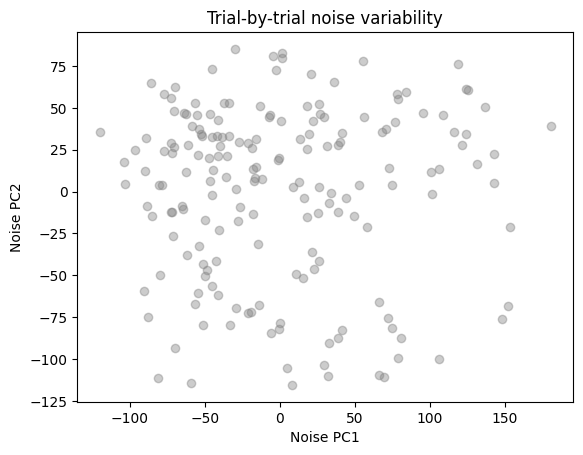

In [14]:
# residuals: (n_trials, n_neurons)
R = residuals - residuals.mean(axis=0)

C = np.cov(R, rowvar=False)  # shape (n_neurons, n_neurons)


from sklearn.decomposition import PCA
pca_noise = PCA(n_components=2)
pcs_noise = pca_noise.fit_transform(R)


import matplotlib.pyplot as plt
plt.scatter(pcs_noise[:,0], pcs_noise[:,1], alpha=0.4, c='gray')
plt.xlabel('Noise PC1'); plt.ylabel('Noise PC2')
plt.title('Trial-by-trial noise variability')
plt.show()

(5, 2)
(180, 2)


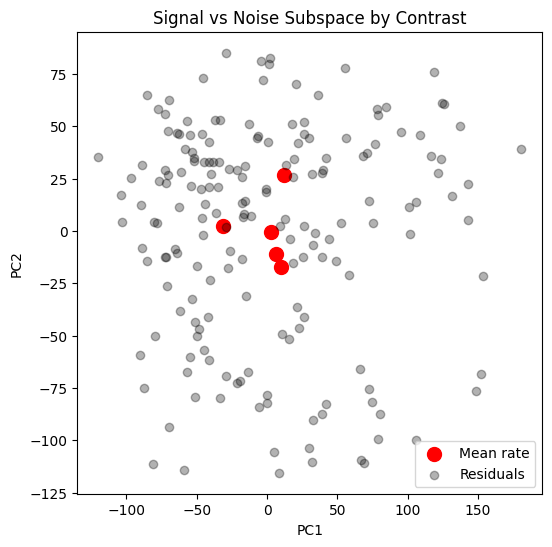

In [15]:
from sklearn.decomposition import PCA

# signal = mean_rates_by_contrast
pca_signal = PCA(n_components=2).fit_transform(mean_rate)
print(pca_signal.shape)
# noise = residuals
pca_noise = PCA(n_components=2).fit_transform(residuals)
print(pca_noise.shape)

plt.figure(figsize=(6,6))
plt.scatter(pca_signal[:,0], pca_signal[:,1], c='r', s=100, label='Mean rate')
plt.scatter(pca_noise[:,0], pca_noise[:,1], c='k', alpha=0.3, label='Residuals')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.legend(); plt.title('Signal vs Noise Subspace by Contrast')
plt.show()


In [16]:
from sklearn.decomposition import PCA
import numpy as np

# Signal PCA
pca_signal_model = PCA(n_components=2)
pca_signal_model.fit(mean_rate)
signal_vec = pca_signal_model.components_[0]

# Noise PCA
pca_noise_model = PCA(n_components=2)
pca_noise_model.fit(residuals)
noise_vec = pca_noise_model.components_[0]

# Compare angle between them (in neuron space)
cos_angle = np.dot(signal_vec, noise_vec) / (np.linalg.norm(signal_vec)*np.linalg.norm(noise_vec))
angle_deg = np.degrees(np.arccos(np.clip(cos_angle, -1, 1)))

print(f"Angle between signal and noise subspace: {angle_deg:.2f}")

Angle between signal and noise subspace: 82.73


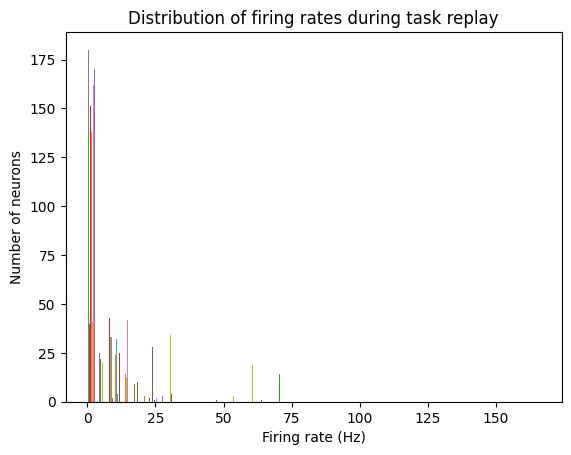

In [17]:
import matplotlib.pyplot as plt
plt.hist(fr, bins=50)
plt.xlabel('Firing rate (Hz)')
plt.ylabel('Number of neurons')
plt.title('Distribution of firing rates during task replay')
plt.show()

In [26]:

eid = '4ecb5d24-f5cc-402c-be28-9d0f7cb14b3a'
# 1. Get list of probe insertions for the session
ins = one.alyx.rest('insertions', 'list', session=eid)
for i in enumerate (ins):
    print(i)
# Typically you’d examine ins[0] or ins[1], e.g.:
probe_id = ins[0]['id']

# 2. Load spike sorting data (you already did)
from brainbox.io.one import SpikeSortingLoader
from iblatlas.atlas import AllenAtlas
ba = AllenAtlas()
sl = SpikeSortingLoader(pid=probe_id, one=one, atlas=ba)
spikes, clusters, channels = sl.load_spike_sorting()

channels = sl.load_channels()  
xyz = np.c_[channels['x'], channels['y'], channels['z']]
stim_passive = one.load_object(eid,'passiveGabor', collection='alf')
print(stim_passive.keys())

(0, {'id': 'da8dfec1-d265-44e8-84ce-6ae9c109b8bd', 'session': '4ecb5d24-f5cc-402c-be28-9d0f7cb14b3a', 'model': '3B2', 'session_info': {'subject': 'SWC_043', 'start_time': '2020-09-21T18:02:16.707541', 'number': 1, 'lab': 'hoferlab', 'id': '4ecb5d24-f5cc-402c-be28-9d0f7cb14b3a', 'projects': ['ibl_neuropixel_brainwide_01'], 'task_protocol': '_iblrig_tasks_ephysChoiceWorld6.4.2'}, 'name': 'probe00', 'json': {'qc': 'PASS', 'n_units': 914, 'xyz_picks': [[786, 624, -568], [786, 624, -767], [761, 624, -942], [710, 599, -1068], [611, 599, -1218], [511, 550, -1468], [386, 550, -1718], [211, 524, -2093], [11, 499, -2668], [-88, 474, -2918], [-88, 474, -3093], [-139, 449, -3243], [-413, 425, -3993], [-488, 425, -4242], [-563, 400, -4468], [-813, 400, -5267], [-913, 324, -5743], [-938, 324, -5893], [-938, 324, -6117]], 'extended_qc': {'alignment_qc': 1.0, 'experimenter': 'PASS', 'apRms_p10_raw': '1.81e-05', 'apRms_p90_raw': '6.85e-05', 'apRms_p10_proc': '1.05e-05', 'apRms_p90_proc': '1.85e-05', 't

In [ ]:
import pandas as pd

stim_df = pd.DataFrame({
    'start': stim_passive['start'],
    'contrast': stim_passive['contrast'],
    'position': stim_passive['position'],
    'phase': stim_passive['phase']
})

# Drop NaNs, then create a combined stimulus key
stim_df = stim_df.dropna()
stim_df['stim_id'] = list(zip(stim_df.contrast, stim_df.position, stim_df.phase))

unique_stims = stim_df['stim_id'].unique()
print(unique_stims)
print(unique_stims.shape)

In [39]:
spike_times = spikes['times']
spike_clusters = spikes['clusters']

stim_start = stim_passive['start']
stim_end= stim_passive['stop']
stim_intervals = np.c_[stim_start, stim_end]


In [61]:
from iblatlas import atlas
print(channels.keys())
ba = atlas.AllenAtlas()        
xyz = np.c_[channels['x'], channels['y'], channels['z']]
region_ids = ba.get_labels(xyz)
acronyms=channels['acronym']
print(np.unique(acronyms))
print(np.unique(region_ids))

dict_keys(['x', 'y', 'z', 'acronym', 'atlas_id', 'axial_um', 'lateral_um', 'labels', 'rawInd'])
['BST' 'HY' 'LPO' 'LSr' 'LSv' 'NDB' 'PS' 'STR' 'aco' 'ccb']
[      226       258       266       351       477       596       900
      1097      1109 484682516]


<Axes: xlabel='ml (um)', ylabel='dv (um)'>

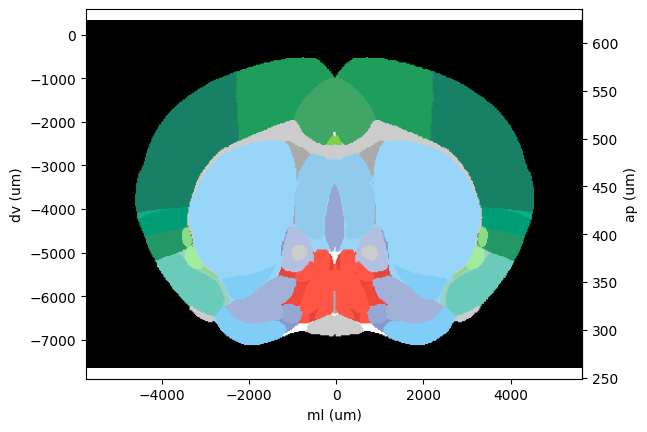

In [42]:
from iblatlas.atlas import AllenAtlas
ba = AllenAtlas()
ba.plot_tilted_slice(xyz, volume='annotation',axis=1)  # xyz = your channels coords